## Example of use of the AG-Segments class. 

In this example, the centroid of one class of the '50 words' (https://www.cs.ucr.edu/~eamonn/time_series_data/) dataset is calculated by the GA-Segments algorithm. This algorithm uses a genetic algorithm for search a serie that minimizes the DTW distance respect all series in a set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from ga_segments.ga import GA_segments

#### Define GA parameters

In [2]:
data_path = './data/50words_TRAIN'
ag_params = {
    'pop_size': 100,
    'ngen': 30,
    'cxpb': 0.1,
    'mutpb': 0.05,
    'batch_evaluate': False,
    'batch_size': 0.5,
    'verbose': True,
    'multi_jobs': True
}

#### Load dataset

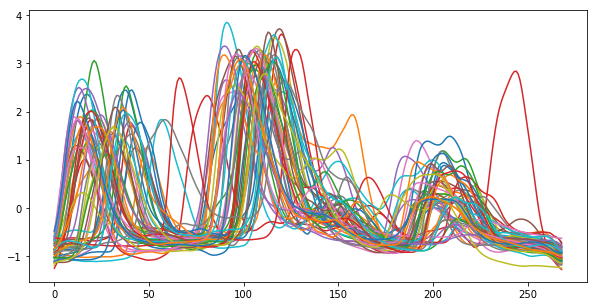

In [3]:
series = pd.read_csv(data_path, header=None)
series = series.loc[series[0] == 1].values  # select series of class 1
series = series[:, 1:]  # skip class value

plt.figure(figsize=(10, 5))
for s in series:
    plt.plot(s[1:])
plt.show()

#### And optimize!

In [4]:
ga = GA_segments(**ag_params)
centroid, best_fitness, log = ga.calculate_centroids(series)          

gen	nevals	avg   	std    	min    	max   
0  	100   	109461	63894.5	50049.3	324240
1  	17    	58076.4	5917.45	47291.7	75363.3
2  	9     	50181.6	2008.58	47291.7	56209  
3  	15    	47983  	788.205	46865.2	50049.3
4  	19    	47282.8	230.806	46704.8	48488.3
5  	27    	46966.1	302.204	45898  	48126  
6  	10    	46545.1	345.567	45196.9	47356  
7  	13    	45946.9	316.472	44859.6	46854.1
8  	14    	45516.7	384.03 	44859.6	46379.2
9  	10    	44977.1	536.767	41581.5	46465.4
10 	7     	44320.1	1216.24	41581.5	45176.7
11 	18    	41950.8	1107.1 	41034.3	44998.2
12 	8     	41196.5	271.679	40222  	42118.5
13 	20    	41021.2	253.094	40222  	41666.4
14 	12    	40610.2	419.022	40167.3	41720.6
15 	18    	40284.4	206.243	40167.3	41791.5
16 	12    	40231.6	234.082	40129.9	42148.5
17 	24    	40253.1	191.803	39941.3	41222.7
18 	17    	40193.7	204.876	39941.3	41734  
19 	17    	40096.5	227.631	39890.6	41143.6
20 	12    	40000.4	240.081	39890.6	41484.4
21 	12    	39954.2	142.424	39890.6	40819.1
22 	10    	3992

#### Plot the results

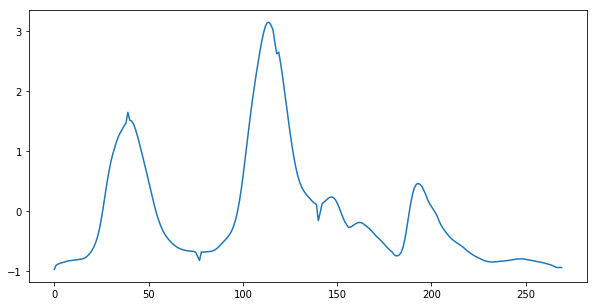

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(centroid)
plt.show()